# Cleaning and Exploratory Data Analysis

- This notebook will detail my exploratory data analysis to understand the data
- As the data has been scraped I will need to clean the data in order to be able to analyse it

In [1418]:
import pandas as pd
import seaborn as sns # visualisation!
import matplotlib.pyplot as plt # visualisation! ## parent library for seaborn to work
import numpy as np # Used np arrays
import re

# Combine all the scraped csv's into one csv

The combined csv contains property information for all properties listed on rightmove.co.uk for sale within as of 25/03/2023:
   1) Leeds
2) Bradford
3) Wakefield
4) Halifax
5) Huddersfield

In [1419]:
# Read in all the csvs as dataframes
# leedspt1 = pd.read_csv('../Data/leeds_properties_pt1.csv')
# leedspt2 = pd.read_csv('../Data/leeds_properties_pt2.csv')
# bradford = pd.read_csv('../Data/bradford_properties.csv')
# wakefieldpt1 = pd.read_csv('../Data/wakefield_properties_pt1.csv')
# wakefieldpt2 = pd.read_csv('../Data/wakefield_properties_pt2.csv')
# halifax = pd.read_csv('../Data/halifax_properties.csv')
# huddersfieldpt1 = pd.read_csv('../Data/huddersfield_properties.csv')
# huddersfieldpt2 = pd.read_csv('../Data/huds_properties_pt2.csv')

In [1420]:
# Combine all the dataframes into one dataframe
# properties = pd.concat([leedspt1, leedspt2, bradford, wakefieldpt1, wakefieldpt2, halifax, huddersfieldpt1, huddersfieldpt2])
# properties.reset_index(drop=True, inplace=True)

In [1421]:
# Save this dataframe to a csv
# properties.to_csv('properties.csv', index=False)

In [1422]:
# Read in the properties from a csv
properties = pd.read_csv('../Data/properties.csv')

In [1423]:
# Before any cleaning there are 11272 property listings that have been scraped
properties.shape

(11272, 9)

In [1424]:
# Look at the head of the properties
properties.head()

,url,address,property_type,bedrooms,bathrooms,size_sq_ft,tenure,nearest_station,price
0,https://www.rightmove.co.uk/properties/1319880...,"The Quays, 3 Concordia Street, Leeds, West Yor...",Apartment,×1,×1,NaN,Leasehold,0.1 miles,"£180,000"
1,https://www.rightmove.co.uk/properties/1272674...,"Grade II Apartments, Alexander Street, LS1",Apartment,×3,×3,NaN,Ask agent,0.5 miles,"£741,175"
2,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,×2,×2,NaN,Leasehold,0.3 miles,"£449,995"
3,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,×2,×2,NaN,Leasehold,0.3 miles,"£425,000"
4,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,×2,×2,NaN,Leasehold,0.3 miles,"£424,995"


In [1425]:
# Look at the tail of the properties
properties.tail()

,url,address,property_type,bedrooms,bathrooms,size_sq_ft,tenure,nearest_station,price
11267,https://www.rightmove.co.uk/properties/1328843...,"Greenhill Bank Road, New Mill, Holmfirth, West...",Terraced,×2,×1,NaN,Freehold,1.6 miles,"£150,000"
11268,https://www.rightmove.co.uk/properties/1281187...,"Thick Hollins, Meltham, Holmfirth, West Yorksh...",Terraced,×2,×1,NaN,Freehold,2.8 miles,"£150,000"
11269,https://www.rightmove.co.uk/properties/1328625...,"Holmclose, Holmbridge, Holmfirth, West Yorkshi...",Semi-Detached,×2,×1,NaN,Freehold,3.4 miles,"£150,000"
11270,https://www.rightmove.co.uk/properties/1265926...,"France Hill, Honley, Holmfirth, HD9",Terraced,×2,×1,NaN,Freehold,0.5 miles,"£148,000"
11271,https://www.rightmove.co.uk/properties/1327196...,"Upper Sunny Bank Mews, Meltham, Holmfirth",Apartment,×2,×1,NaN,Leasehold,2.2 miles,"£140,000"


In [1426]:
# Look at the data types of the columns
# All object types, I will have to convert types later
properties.dtypes

url                object
address            object
property_type      object
bedrooms           object
bathrooms          object
size_sq_ft         object
tenure             object
nearest_station    object
price              object
dtype: object

In [1427]:
# Number of rows now in the data
properties.shape[0]

11272

# Let's have a look at the nulls

In [1428]:
# Define a function that shows the count and percentage of nulls per feature
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum()
    total_cnt = len(dataframe)
    null_vals = pd.DataFrame(null_vals,columns=['null'])
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3)
    return null_vals.sort_values('percent', ascending=False)

In [1429]:
# Call function
null_vals(properties)

,null,percent
size_sq_ft,10408,92.335
bathrooms,1277,11.329
bedrooms,215,1.907
tenure,145,1.286
property_type,50,0.444
nearest_station,12,0.106
address,11,0.098
price,11,0.098
url,0,0.000


- Really high amount of nulls for size_sq_ft - This relates to the size of a property but sometimes the listings display land for sale which details the number of square feet land there is (I will drop this column when modelling as the percentage of nulls is really high 90+%) - can't really compute this for other properties
- Around 10% of the data has null values for bathrooms
- Around 2% of the data has null values for bedrooms
- Around 2% of the data has null values for tenure
- Potentially can drop the rows with null values for bedrooms and tenure as they are a low percentage
- Need to consider how I will approach the nulls for bathrooms, one assumption that could be made is that a property has at least 1 bathroom so replace nulls with a value for 1
- Less than 1% nulls for property_type - Will drop these nulls as I need values for property_type to train model
- Less than 1% nulls for nearest_station - Will drop these nulls as it's a very small percentage of the dataset
- Less than 1% nulls for address and price - Will drop these, these listings have been scraped from as the estate agent has removed the listing from rightmove hence the address and price are not available but the url is still active

In [1430]:
# Looking at the urls below, you can see that the listing has been removed by the agent when address is null
properties[properties['address'].isnull()]

,url,address,property_type,bedrooms,bathrooms,size_sq_ft,tenure,nearest_station,price
1062,https://www.rightmove.co.uk/properties/1323461...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1390,https://www.rightmove.co.uk/properties/1326137...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2522,https://www.rightmove.co.uk/properties/1280695...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3010,https://www.rightmove.co.uk/properties/1317521...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3305,https://www.rightmove.co.uk/properties/1295441...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3705,https://www.rightmove.co.uk/properties/1328530...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5541,https://www.rightmove.co.uk/properties/1324628...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5821,https://www.rightmove.co.uk/properties/1328376...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6070,https://www.rightmove.co.uk/properties/1328524...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9326,https://www.rightmove.co.uk/properties/1280205...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1431]:
# This is the same listing as above
properties[properties['price'].isnull()]

,url,address,property_type,bedrooms,bathrooms,size_sq_ft,tenure,nearest_station,price
1062,https://www.rightmove.co.uk/properties/1323461...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1390,https://www.rightmove.co.uk/properties/1326137...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2522,https://www.rightmove.co.uk/properties/1280695...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3010,https://www.rightmove.co.uk/properties/1317521...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3305,https://www.rightmove.co.uk/properties/1295441...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3705,https://www.rightmove.co.uk/properties/1328530...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5541,https://www.rightmove.co.uk/properties/1324628...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5821,https://www.rightmove.co.uk/properties/1328376...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6070,https://www.rightmove.co.uk/properties/1328524...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9326,https://www.rightmove.co.uk/properties/1280205...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1432]:
# I need to remove all rows where address or price is null as they are useless rows of data
# Remove rows with nulls for nearest station as it is only twelve nulls
# Remove rows with nulls for tenure and property_type as they are less than 2% of the data
properties.dropna(
    axis = 0,
    how = 'any',
    subset = ['address', 'price', 'nearest_station', 'tenure', 'property_type'],
    inplace = True
)

In [1433]:
# Check nulls now
null_vals(properties)

,null,percent
size_sq_ft,10267,92.495
bathrooms,1135,10.225
bedrooms,86,0.775
url,0,0.000
address,0,0.000
property_type,0,0.000
tenure,0,0.000
nearest_station,0,0.000
price,0,0.000


# Let's look at the features one by one

## Look at the address column
- Assure that the rows are unique i.e. the same number as the number of rows in the dataframe

In [1434]:
# Check if the number of unique addresses is the same as the number of addresses in the dataframe
properties.shape[0] == properties['address'].nunique()

False

In [1435]:
# Number of unique addresses
properties['address'].nunique()

9092

In [1436]:
# Get the number of rows with address duplicated
len(properties[properties['address'].duplicated() == True])

2008

In [1437]:
# Display the rows where the address is duplicated
properties[properties['address'].duplicated() == True]
# Looking at this, some properties often Apartments and Flats have the same address which is okay and makes sense
# Furthermore, sometimes the exact same property can be seen to be listed twice or multiple time e.g. rows 1704 and 1705 below
# I believe this is the case as the property listings may be displayed multiple times on the page of results for a postcode outcode
# Hence the url for this property would be scraped multiple times and then the property details would be scraped and appended to the csv multiple times

,url,address,property_type,bedrooms,bathrooms,size_sq_ft,tenure,nearest_station,price
3,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,×2,×2,NaN,Leasehold,0.3 miles,"£425,000"
4,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,×2,×2,NaN,Leasehold,0.3 miles,"£424,995"
5,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,×2,×2,NaN,Leasehold,0.3 miles,"£399,995"
6,https://www.rightmove.co.uk/properties/1325840...,"LS1 Buy to Let Flats, Leeds",Apartment,×2,×2,NaN,Leasehold,0.3 miles,"£375,000"
9,https://www.rightmove.co.uk/properties/1324187...,"LS1 Buy to Let Flats, Leeds",Apartment,×2,×2,NaN,Leasehold,0.3 miles,"£374,995"
...,...,...,...,...,...,...,...,...,...
11241,https://www.rightmove.co.uk/properties/1241920...,"Wilshaw Road, Meltham, Holmfirth",Detached,×5,×3,NaN,Freehold,2.4 miles,"£825,000"
11242,https://www.rightmove.co.uk/properties/1302035...,"Bank Street, Jackson Bridge, Holmfirth, HD9",Cottage,×3,×1,NaN,Freehold,2.4 miles,"£184,000"
11249,https://www.rightmove.co.uk/properties/1286018...,"Off Helme Lane, Meltham",Semi-Detached,×2,×1,NaN,Freehold,2.2 miles,"£179,500"
11260,https://www.rightmove.co.uk/properties/1313671...,"Dunford Road, Holmfirth",Apartment,×2,×1,NaN,Freehold,2.2 miles,"£160,000"


## Dealing with property listings that have been scraped multiple times and have hence become duplicated data

As mentioned previously, sometimes the exact same property can be seen to be listed twice or multiple times e.g. rows 1704 and 1705 in the results for the cell above
I believe this is the case as the property listings may be displayed multiple times on the page of results for a postcode outcode, as rightmove.co.uk try to highlight or feature that listing as a marketing ploy
Hence the url for this property would be scraped multiple times and then the property details would be scraped and appended to the csv multiple times

I need to keep only the first occurrence of a duplicated row of data, this will be done before progressing any further

In [1438]:
# Drop the duplicates and keep the first occurrence of a property listing
properties = properties.drop_duplicates(
    subset = ['address', 'property_type', 'bedrooms', 'bathrooms', 'size_sq_ft', 'tenure', 'nearest_station', 'price'],
    keep = 'first').reset_index(drop = True)
properties

,url,address,property_type,bedrooms,bathrooms,size_sq_ft,tenure,nearest_station,price
0,https://www.rightmove.co.uk/properties/1319880...,"The Quays, 3 Concordia Street, Leeds, West Yor...",Apartment,×1,×1,NaN,Leasehold,0.1 miles,"£180,000"
1,https://www.rightmove.co.uk/properties/1272674...,"Grade II Apartments, Alexander Street, LS1",Apartment,×3,×3,NaN,Ask agent,0.5 miles,"£741,175"
2,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,×2,×2,NaN,Leasehold,0.3 miles,"£449,995"
3,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,×2,×2,NaN,Leasehold,0.3 miles,"£425,000"
4,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,×2,×2,NaN,Leasehold,0.3 miles,"£424,995"
...,...,...,...,...,...,...,...,...,...
10474,https://www.rightmove.co.uk/properties/1328843...,"Greenhill Bank Road, New Mill, Holmfirth, West...",Terraced,×2,×1,NaN,Freehold,1.6 miles,"£150,000"
10475,https://www.rightmove.co.uk/properties/1281187...,"Thick Hollins, Meltham, Holmfirth, West Yorksh...",Terraced,×2,×1,NaN,Freehold,2.8 miles,"£150,000"
10476,https://www.rightmove.co.uk/properties/1328625...,"Holmclose, Holmbridge, Holmfirth, West Yorkshi...",Semi-Detached,×2,×1,NaN,Freehold,3.4 miles,"£150,000"
10477,https://www.rightmove.co.uk/properties/1265926...,"France Hill, Honley, Holmfirth, HD9",Terraced,×2,×1,NaN,Freehold,0.5 miles,"£148,000"


In [1439]:
# Number of rows remaining now that duplicates removed and first occurrence retained
properties.shape[0]

10479

## Look at property_type column

In [1440]:
# Look at the unique values for property_type column
properties['property_type'].unique()

array(['Apartment', 'Flat', 'Penthouse', 'Parking', 'Terraced',
       'Detached', 'End of Terrace', 'Studio', 'Town House',
       'Semi-Detached', 'Link Detached House', 'Duplex', 'House',
       'Semi-Detached Bungalow', 'Retirement Property', 'Ground Flat',
       'House of Multiple Occupation', 'Bungalow', 'Block of Apartments',
       'Maisonette', 'Barn Conversion', 'Park Home', 'Detached Bungalow',
       'Terraced Bungalow', 'Equestrian Facility', 'Cottage',
       'Coach House', 'Character Property', 'Mobile Home',
       'Country House', 'Farm House', 'Mews', 'Barn', 'Chalet',
       'Cluster House', 'Villa', 'House Share', 'Lodge', 'Caravan',
       'Manor House'], dtype=object)

In [1441]:
# Get the number of unique values for the property_type column
# There is a considerably high amount of unique values for the property type
properties['property_type'].nunique()

40

In [1442]:
# Get a value count for each type of property
properties['property_type'].value_counts()

Detached                        2435
Semi-Detached                   2415
Terraced                        1663
Apartment                       1071
End of Terrace                   574
Flat                             439
Bungalow                         359
Town House                       294
Detached Bungalow                266
Semi-Detached Bungalow           231
House                            209
Cottage                          125
Barn Conversion                   63
Link Detached House               49
Character Property                37
Park Home                         33
Ground Flat                       32
Retirement Property               32
Studio                            29
Penthouse                         20
Duplex                            18
Terraced Bungalow                 10
Farm House                         9
Mews                               9
Maisonette                         9
Block of Apartments                6
Equestrian Facility                5
C

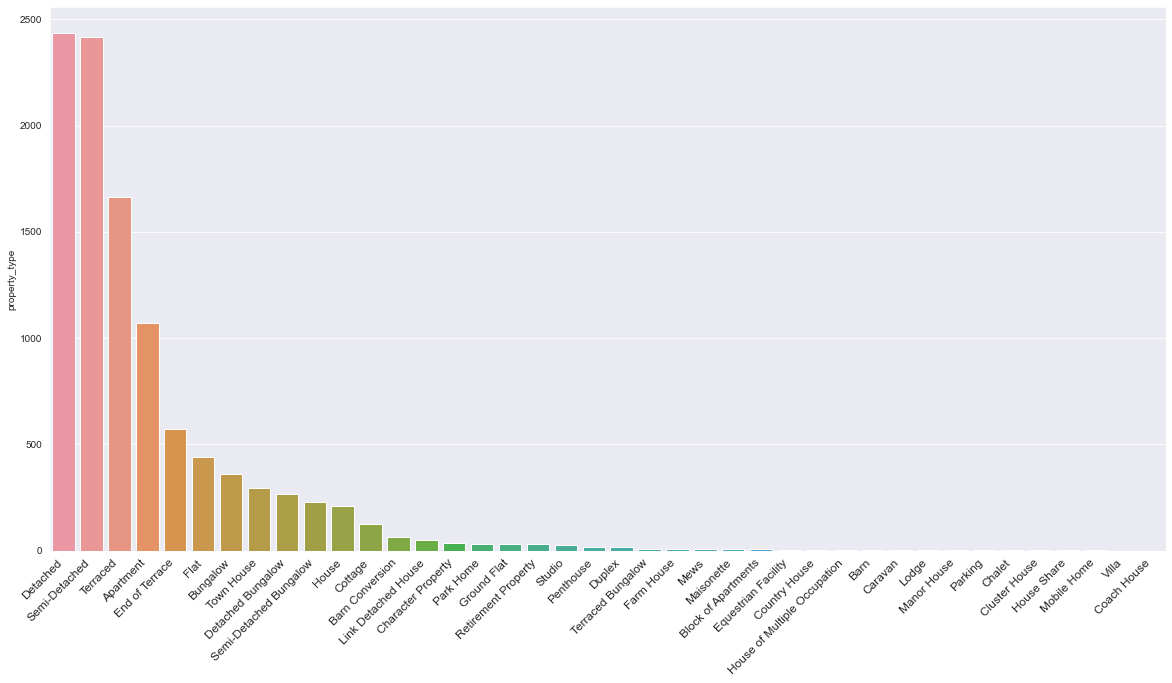

In [1443]:
# Look at a count plot of each type of property in the data
plt.figure(figsize = (20, 10))
sns.barplot(y = properties['property_type'].value_counts(), x = properties['property_type'].value_counts().index)
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
plt.show()
# Can see that Detached, Semi-Detached, Terraced and Apartment account for about 72% of the data

## Looking at the tenure column

In [1444]:
# Look at the unique values for tenure column
# There are 6 values - in the interest of my model I would like it to make predictions for Freehold properties
# There are some properties that have no value for tenure, will check the nulls for this
properties['tenure'].unique()

array(['Leasehold', 'Ask agent', 'Freehold', 'Share of Freehold',
       'Ask developer'], dtype=object)

In [1445]:
# Do a value count for the tenures
properties['tenure'].value_counts()
# Can see that freehold makes up 75% of the data

Freehold             7678
Leasehold            1754
Ask agent             690
Ask developer         332
Share of Freehold      25
Name: tenure, dtype: int64

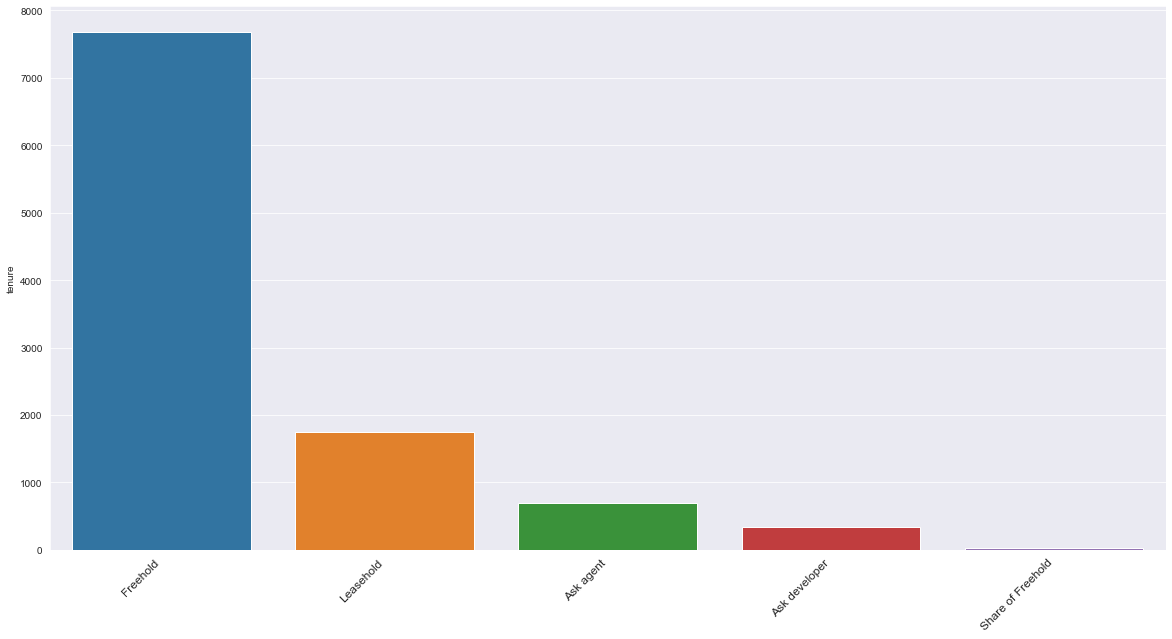

In [1446]:
# Look at the count plot of each type of tenure in the data
plt.figure(figsize = (20, 10))
sns.barplot(y = properties['tenure'].value_counts(), x = properties['tenure'].value_counts().index)
plt.xticks(rotation = 45, horizontalalignment = 'right', fontweight = 'light', fontsize = 'large')
plt.show()
# Can see that Freehold accounts for almost 75% of the data

# See if I can determine what property types I could cut the dataset down to
- They need to also be Freehold properties
- Looking at the plot below a sensible approach would be to cut down the data to be properties of Detached, Semi-detached and Terraced type
- There was previously an argument to include Apartments also but the tenure type for apartments is predominantly Leasehold which is what I am trying to avoid

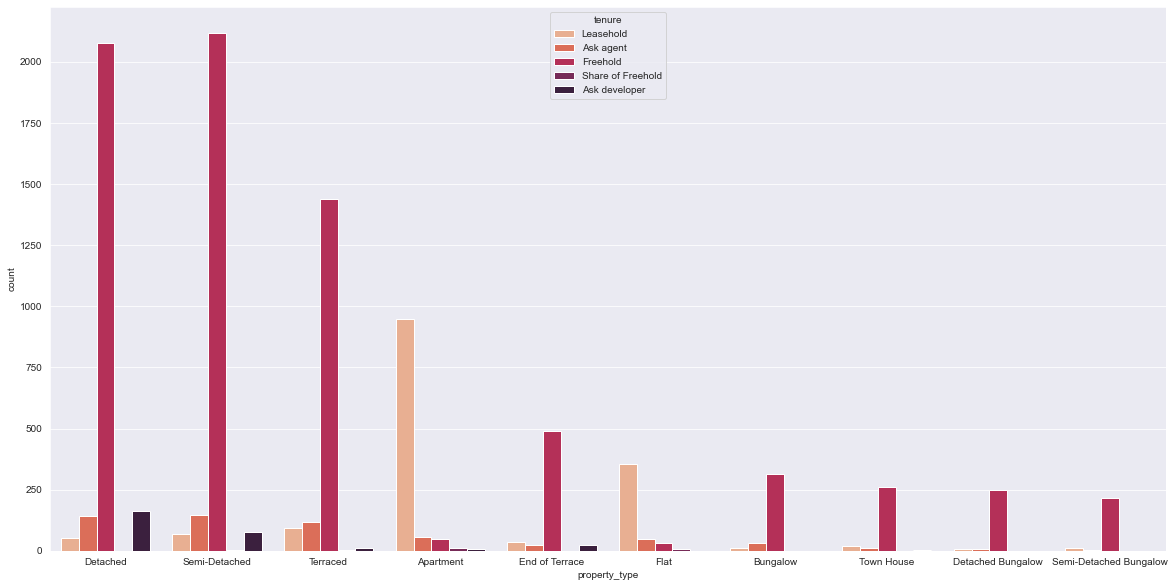

In [1447]:
plt.figure(figsize = (20, 10))
sns.countplot(x=properties['property_type'], hue='tenure', data=properties, order=properties.property_type.value_counts().iloc[:10].index, palette='rocket_r')
plt.show()

In [1448]:
# Find the number of rows that would be classed as Freehold and Detached/Semi-Detached/Terraced
check = properties[properties['tenure'] == 'Freehold'] #Only freehold properties
# Only Detached, Semi-Detached or Terraced
check = check[(check['property_type'] == 'Detached') | (check['property_type'] == 'Semi-Detached') | (check['property_type'] == 'Terraced')]
len(check)

5636

## Handling converting the numerical features into an appropriate type

- Within this section null cleaning may happen in order to successfully convert the type of the column
- You can not convert the type of a column to a numberical type with nulls present in the column

In [1449]:
# Removing £, and ', symbol from the column
properties['price'] = properties['price'].str.replace('£','').str.replace(',', '')

In [1450]:
# 10 rows where the value of the price is not given but instead 'Coming Soon' is written on a listing
properties[properties['price'] == 'Coming Soon']

,url,address,property_type,bedrooms,bathrooms,size_sq_ft,tenure,nearest_station,price
1384,https://www.rightmove.co.uk/properties/1322204...,"Seacroft\r\nLeeds,\r\nLS14 6FU",Semi-Detached,×4,NaN,"1,356 sq. ft.",Ask developer,1.0 miles,Coming Soon
1523,https://www.rightmove.co.uk/properties/1283883...,Manston Lane\r\nLeeds\r\nLS15 8ST,Detached,×4,×2,NaN,Freehold,0.9 miles,Coming Soon
1524,https://www.rightmove.co.uk/properties/1283895...,Manston Lane\r\nLeeds\r\nLS15 8ST,Semi-Detached,×4,×2,NaN,Freehold,0.9 miles,Coming Soon
1600,https://www.rightmove.co.uk/properties/1283874...,Manston Lane\r\nLeeds\r\nLS15 8ST,Semi-Detached,×3,×2,NaN,Freehold,0.9 miles,Coming Soon
1683,https://www.rightmove.co.uk/properties/1283697...,Manston Lane\r\nLeeds\r\nLS15 8ST,Town House,×2,×2,NaN,Freehold,0.9 miles,Coming Soon
3664,https://www.rightmove.co.uk/properties/1308317...,"Bingley Road,\r\nMenston,\r\nLS29 6BA",Semi-Detached,×3,NaN,"1,123 sq. ft.",Freehold,0.6 miles,Coming Soon
4629,https://www.rightmove.co.uk/properties/1327076...,"New School Lane,\r\nCullingworth,\r\nBradford,...",Detached,×3,NaN,NaN,Ask developer,3.0 miles,Coming Soon
4643,https://www.rightmove.co.uk/properties/1327075...,"New School Lane,\r\nCullingworth,\r\nBradford,...",Semi-Detached,×3,NaN,NaN,Ask developer,3.0 miles,Coming Soon
5813,https://www.rightmove.co.uk/properties/1290788...,"Hawbank Field, \r\nSkipton, \r\nBD23 6XD",Detached,×4,NaN,NaN,Freehold,1.2 miles,Coming Soon
10307,https://www.rightmove.co.uk/properties/1321128...,"Plot 1 at Marsh Gardens, Honley HD9",House,×4,×2,"2,000 sq. ft.",Freehold,0.6 miles,Coming Soon


In [1451]:
# Row which doesn't have a value for price, replace with a value of 0
properties['price'] = properties['price'].str.replace('Coming Soon', '£0')

In [1452]:
# Row which doesn't have a value for price, replace with a value of 0
properties['price'] = properties['price'].str.replace('Sale by Tender', '£0')

In [1453]:
# Row which doesn't have a value for price, replace with a value of 0
properties['price'] = properties['price'].str.replace('POA', '£0')

In [1454]:
# Remove rows with a literal string '£'
properties = properties[properties['price'] != '£0']

In [1455]:
# Change the type of this column to an integer
properties['price'] = properties['price'].astype('int')

C:\Users\haide\AppData\Local\Temp/ipykernel_68452/2713565680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['price'] = properties['price'].astype('int')


In [1456]:
# Removing x symbol from the column
properties['bedrooms'] = properties['bedrooms'].str.replace('×', '')

C:\Users\haide\AppData\Local\Temp/ipykernel_68452/4186229156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['bedrooms'] = properties['bedrooms'].str.replace('×', '')


In [1457]:
# I need the drops with nulls from bedrooms - low percentage this is okay
properties.dropna(
    axis = 0,
    how = 'any',
    subset = ['bedrooms'],
    inplace = True
)

C:\Users\haide\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [1458]:
# Change the type of this column to an integer
properties['bedrooms'] = properties['bedrooms'].astype('int')

C:\Users\haide\AppData\Local\Temp/ipykernel_68452/4170719804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['bedrooms'] = properties['bedrooms'].astype('int')


In [1459]:
# Look at the rows where bathrooms is null
properties[properties['bathrooms'].isnull()]

,url,address,property_type,bedrooms,bathrooms,size_sq_ft,tenure,nearest_station,price
105,https://www.rightmove.co.uk/properties/1323958...,"Great George Street, Leeds, West Yorkshire, LS1",Flat,1,NaN,NaN,Leasehold,0.6 miles,97500
150,https://www.rightmove.co.uk/properties/1144877...,"North Street, Leeds",Flat,1,NaN,NaN,Leasehold,0.7 miles,127000
153,https://www.rightmove.co.uk/properties/1312088...,"Millwright Apartments, 47 Byron Street, Leeds,...",Flat,2,NaN,NaN,Leasehold,0.8 miles,110000
157,https://www.rightmove.co.uk/properties/1309141...,"Citispace South, 11 Regent Street, Leeds, West...",Flat,1,NaN,NaN,Leasehold,0.8 miles,95000
158,https://www.rightmove.co.uk/properties/1233297...,"The Chandlers, Leeds, West Yorkshire, LS2 7EZ",Flat,1,NaN,NaN,Leasehold,0.5 miles,95000
...,...,...,...,...,...,...,...,...,...
10396,https://www.rightmove.co.uk/properties/1319520...,"20 Town End Avenue, Holmfirth HD9 1QW",Detached,4,NaN,NaN,Freehold,1.4 miles,320000
10415,https://www.rightmove.co.uk/properties/1313398...,"Poppy Gardens, Meltham, Holmfirth HD9 5AU",Semi-Detached,3,NaN,NaN,Freehold,2.4 miles,275000
10434,https://www.rightmove.co.uk/properties/1315925...,"New Mill Road, Brockholes, Holmfirth, West Yor...",Bungalow,3,NaN,NaN,Freehold,0.4 miles,220000
10471,https://www.rightmove.co.uk/properties/1329067...,"New Street, Meltham, Holmfirth HD9 5NT",End of Terrace,3,NaN,NaN,Freehold,2.5 miles,155000


In [1460]:
# Assumption made that all properties will have at least one bathroom so fill nulls with a value of 1
# After handling the data whilst changing this, it produced results that don't seem correct
# Will not replace the rows where the value for bathrooms is null with 1 anymore
# properties['bathrooms'].fillna('×1', inplace=True)

In [1461]:
# I don't believe there is a way I can confidently impute the number of bathrooms a property will have so I will drop the rows which have a null value for bathrooms
properties.dropna(
    axis = 0,
    how = 'any',
    subset = ['bathrooms'],
    inplace = True
)

C:\Users\haide\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [1462]:
# Check for nulls
null_vals(properties)

,null,percent
size_sq_ft,8694,92.127
url,0,0.000
address,0,0.000
property_type,0,0.000
bedrooms,0,0.000
bathrooms,0,0.000
tenure,0,0.000
nearest_station,0,0.000
price,0,0.000


In [1463]:
# Removing x symbol from the column
properties['bathrooms'] = properties['bathrooms'].str.replace('×','')

C:\Users\haide\AppData\Local\Temp/ipykernel_68452/4124309760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['bathrooms'] = properties['bathrooms'].str.replace('×','')


In [1464]:
# Change the type of this column to an integer
properties['bathrooms'] = properties['bathrooms'].astype('int')

C:\Users\haide\AppData\Local\Temp/ipykernel_68452/1661169606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['bathrooms'] = properties['bathrooms'].astype('int')


In [1465]:
# Removing ' miles' symbol from the nearest station column
properties['nearest_station'] = properties['nearest_station'].str.replace(' miles','')

C:\Users\haide\AppData\Local\Temp/ipykernel_68452/1915993214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['nearest_station'] = properties['nearest_station'].str.replace(' miles','')


In [1466]:
# Change the type of this column to a float
properties['nearest_station'] = properties['nearest_station'].astype('float')

C:\Users\haide\AppData\Local\Temp/ipykernel_68452/456575014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties['nearest_station'] = properties['nearest_station'].astype('float')


In [1467]:
# Check nulls for size_sq_ft
null_vals(properties)

,null,percent
size_sq_ft,8694,92.127
url,0,0.000
address,0,0.000
property_type,0,0.000
bedrooms,0,0.000
bathrooms,0,0.000
tenure,0,0.000
nearest_station,0,0.000
price,0,0.000


In [1468]:
# Considered handling the size_sq_ft column but it has a very high % of nulls - around 90% of the data
# No way to impute this value for rows with a null
# Drop size_sq_ft column (high percentage of nulls)
properties.drop(columns=['size_sq_ft'], inplace=True)

C:\Users\haide\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1469]:
# Check the types and number of nulls per column now
# Check if the types have changed and there are no nulls in the data
properties.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9437 entries, 0 to 10478
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              9437 non-null   object 
 1   address          9437 non-null   object 
 2   property_type    9437 non-null   object 
 3   bedrooms         9437 non-null   int32  
 4   bathrooms        9437 non-null   int32  
 5   tenure           9437 non-null   object 
 6   nearest_station  9437 non-null   float64
 7   price            9437 non-null   int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 552.9+ KB


In [1470]:
# No nulls in the data
null_vals(properties)

,null,percent
url,0,0.0
address,0,0.0
property_type,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
tenure,0,0.0
nearest_station,0,0.0
price,0,0.0


In [1471]:
# Observe the changes made
properties.head()

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price
0,https://www.rightmove.co.uk/properties/1319880...,"The Quays, 3 Concordia Street, Leeds, West Yor...",Apartment,1,1,Leasehold,0.1,180000
1,https://www.rightmove.co.uk/properties/1272674...,"Grade II Apartments, Alexander Street, LS1",Apartment,3,3,Ask agent,0.5,741175
2,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,2,2,Leasehold,0.3,449995
3,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,2,2,Leasehold,0.3,425000
4,https://www.rightmove.co.uk/properties/1325839...,"LS1 Buy to Let Flats, Leeds",Apartment,2,2,Leasehold,0.3,424995


# Looking at the bedrooms feature

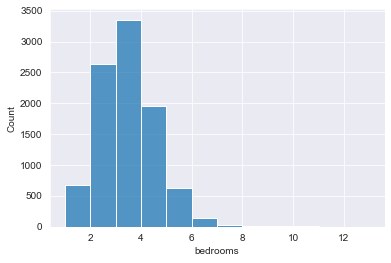

In [1472]:
# Do a histogram plot for bedrooms
sns.histplot(properties, x='bedrooms', binwidth=1)
plt.show()

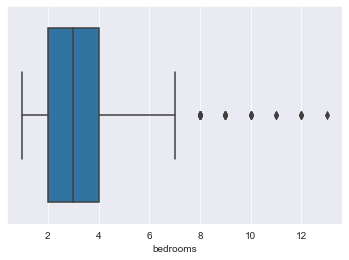

In [1473]:
# Do a box plot for bedrooms - Clear outliers of properties with more than 7 bedrooms
sns.boxplot(data=properties, x='bedrooms')
plt.show()

In [1474]:
# What does histogram look like when removing the outliers
removebedroomoutlier = properties[properties['bedrooms'] <= 7]
# Histogram plot again

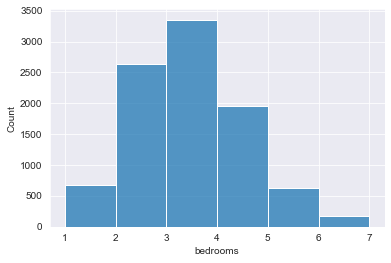

In [1475]:
# Can see the majority of properties have between 1 and 6 bedrooms
# Can see a near normal distribution of bedrooms
sns.histplot(removebedroomoutlier, x='bedrooms', binwidth=1)
plt.show()

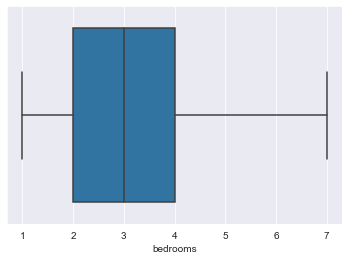

In [1476]:
# Boxplot again with outlier removed
# The IQR is between the LQ of 2 bedrooms and UQ of 4 bedrooms, with a median of 3 bedrooms
sns.boxplot(data=removebedroomoutlier, x='bedrooms')
plt.show()

# Looking at the bathrooms feature

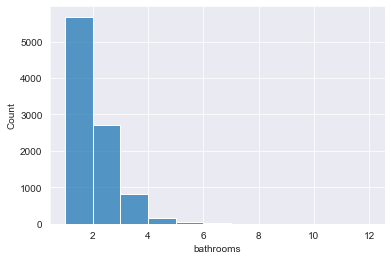

In [1477]:
# Do a histogram plot for bathrooms
# Presents a right skew, more than 2/3 the properties have 1-2 bathrooms, nearly a third have 3 bathrooms
# May get the model to predict from 1-5 bathrooms
sns.histplot(properties, x='bathrooms', binwidth=1)
plt.show()

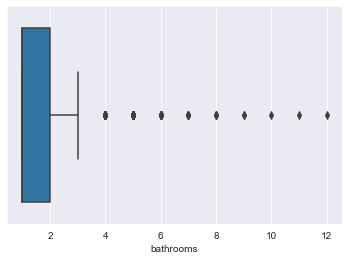

In [1478]:
# Do a box plot for bathrooms - Shows a lot of outliers above 3 bathrooms
sns.boxplot(data=properties, x='bathrooms')
plt.show()

In [1479]:
# Do a value count and see what number of properties have more than 3 bathrooms
properties['bathrooms'].value_counts()
# Hardly anyone has more than 3 bathrooms, need to make a decision about whether to remove these properties
# 1-3 bathrooms accounts for around 98% of the data

1     5682
2     2700
3      822
4      162
5       40
6       15
7        7
8        4
9        2
12       1
10       1
11       1
Name: bathrooms, dtype: int64

In [1480]:
# What does histogram look like when removing the outliers
removebathroommoutlier = properties[properties['bathrooms'] <= 4]
# Histogram plot again

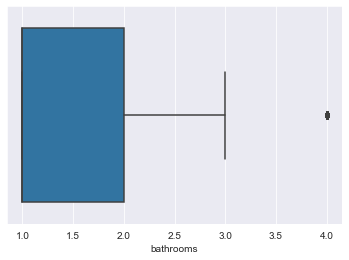

In [1481]:
# Do a box plot for bathrooms - Shows an outlier of a property with 4 bathrooms
# Can see most properties have 1-3 bathrooms
sns.boxplot(data=removebathroommoutlier, x='bathrooms')
plt.show()

In [1482]:
# Do a value count and see what number of properties have more than 3 bathrooms
# Very small amount
# Will go with 1-3 bathrooms
removebathroommoutlier['bathrooms'].value_counts()

1    5682
2    2700
3     822
4     162
Name: bathrooms, dtype: int64

# Looking at the nearest station feature (nearest train station)

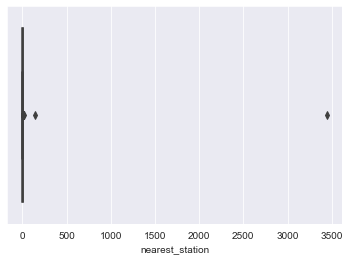

In [1483]:
# Do a box plot for bathrooms - Shows a lot of outliers, let's look at this at a more granular level
sns.boxplot(data=properties, x='nearest_station')
plt.show()

In [1484]:
# One outlier it seems that is way out of scale, extremely high distant to the nearest station
properties[properties['nearest_station'] > 3000]

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price
10266,https://www.rightmove.co.uk/properties/1302738...,"The Park, Kirkburton, Huddersfield, West Yorks...",Apartment,1,1,Leasehold,3443.0,70000


In [1485]:
# What does boxplot look like when removing the outlier (Will remove outliers at the end)
removesstationoutlier = properties[properties['nearest_station'] < 3000]
# Boxplot plot again

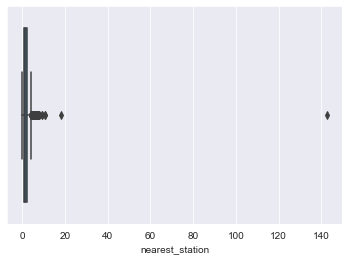

In [1486]:
# There are more distant rail stations, this won't be the case in West Yorkshire
sns.boxplot(data=removesstationoutlier, x='nearest_station')
plt.show()

In [1487]:
# Remove outliers further
removesstationoutlier = removesstationoutlier[removesstationoutlier['nearest_station'] < 17.5]

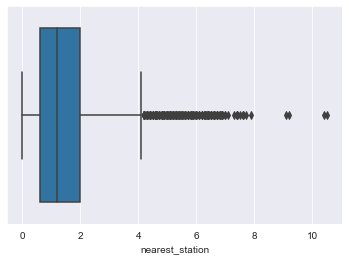

In [1488]:
# There are more distant rail stations, this won't be the case in West Yorkshire
sns.boxplot(data=removesstationoutlier, x='nearest_station')
plt.show()
# Looking at this box plot it may be a good idea to remove rows which have a distance of less than 12 miles to the nearest train station
# i.e. classing any property with a distance more than 17.5 miles from a train station as an outlier

In [1489]:
# Remove outliers completely
removesstationoutlier = removesstationoutlier[removesstationoutlier['nearest_station'] <= 4]

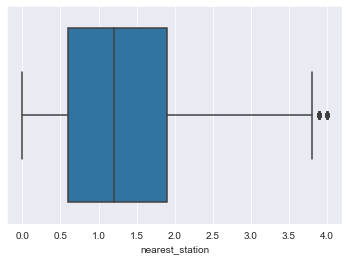

In [1490]:
# There are more distant rail stations, this won't be the case in West Yorkshire
sns.boxplot(data=removesstationoutlier, x='nearest_station')
plt.show()

# Looking at the price feature

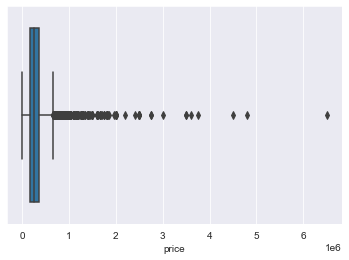

In [1491]:
# Do a box plot for price
sns.boxplot(data=properties, x='price')
plt.show()

In [1492]:
# Can see there are 145 properties with a value equal or well over 1 million
properties[properties['price'] >= 1000000]

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price
271,https://www.rightmove.co.uk/properties/1280839...,"Headingley Lane, Leeds",Semi-Detached,12,12,Freehold,0.5,1175000
272,https://www.rightmove.co.uk/properties/8591946...,"Hyde Park Road, Leeds, West Yorkshire",Apartment,11,1,Freehold,0.6,1050000
474,https://www.rightmove.co.uk/properties/1302825...,"Old Park Road, Roundhay, Leeds, West Yorkshire",Detached,7,3,Freehold,3.2,1600000
475,https://www.rightmove.co.uk/properties/1317840...,"Wedgewood Drive, Roundhay , Leeds",Detached,6,2,Freehold,3.3,1350000
902,https://www.rightmove.co.uk/properties/1129282...,"SKY GARDENS, Silver Street, Water Lane, Leeds,...",Flat,10,1,Ask agent,0.4,1837700
...,...,...,...,...,...,...,...,...
10272,https://www.rightmove.co.uk/properties/1275544...,"Westgate, Holmfirth, HD9",Country House,4,2,Freehold,0.6,1300000
10273,https://www.rightmove.co.uk/properties/1232333...,"Knowle Top, Wood Nook Between Honley And Melth...",Detached,4,2,Freehold,2.3,1295000
10274,https://www.rightmove.co.uk/properties/1214078...,"Heys Road, Thongsbridge",Detached,4,4,Freehold,1.1,1200000
10275,https://www.rightmove.co.uk/properties/1327531...,"Binns Lane, Holmfirth",Detached,5,2,Freehold,2.1,1150000


In [1493]:
# Look at the boxplot with rows removed with a value greater than 1000000
removepriceoutlier = properties[properties['price'] < 1000000]

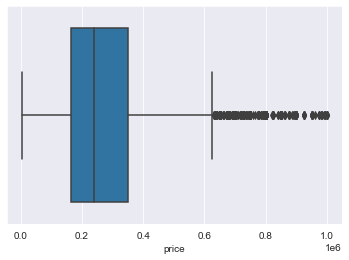

In [1494]:
# Do a box plot for price
sns.boxplot(data=removepriceoutlier, x='price')
plt.show()

In [1495]:
# Look at the boxplot with rows removed with a value greater than 575000
removepriceoutlier = properties[properties['price'] < 575000]

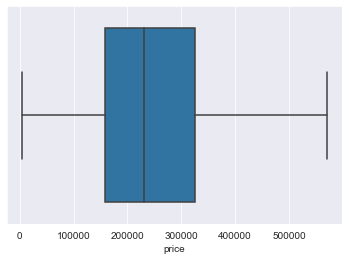

In [1496]:
# Do a box plot for price - prices with no outliers
sns.boxplot(data=removepriceoutlier, x='price')
plt.show()

# Let's look deeper into the numerical features (before outlier removal)

In [1497]:
# Get further insight regarding each feature
properties.describe()

,bedrooms,bathrooms,nearest_station,price
count,9437.000000,9437.000000,9437.000000,9.437000e+03
mean,2.995655,1.549009,1.868835,3.010687e+05
std,1.167909,0.829625,35.476413,2.502477e+05
min,1.000000,1.000000,0.000000,5.000000e+03
25%,2.000000,1.000000,0.600000,1.650000e+05
50%,3.000000,1.000000,1.200000,2.450000e+05
75%,4.000000,2.000000,2.000000,3.600000e+05
max,13.000000,12.000000,3443.000000,6.500000e+06


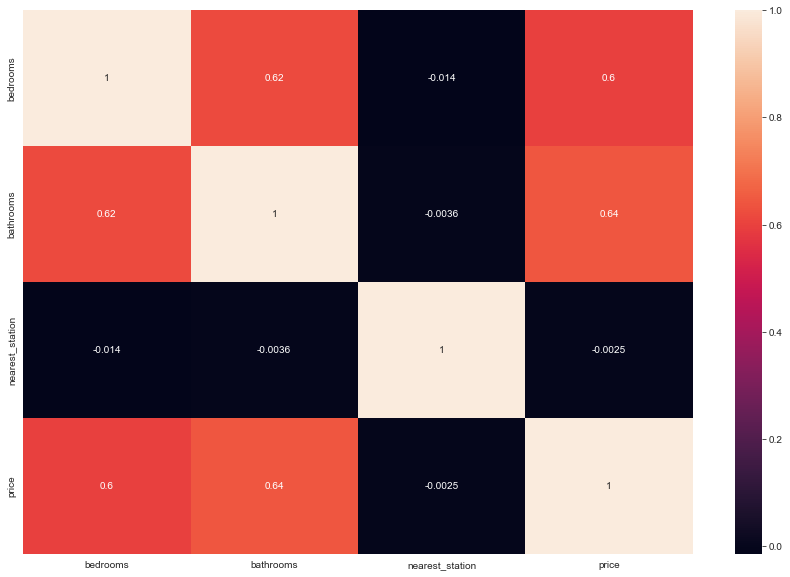

In [1498]:
# Plot a correlation heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(properties.corr(), annot = True)
plt.show()
# Can see both price and bedroom have a strong positive correlation with the price but are also strong correlated hence there is multicollinearity between them
# Strangely, bathrooms has a stronger correlation with price then bathrooms does

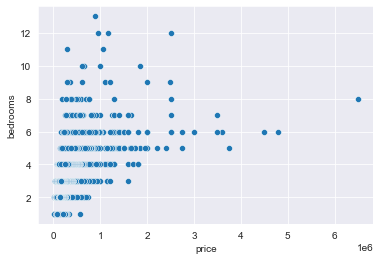

In [1499]:
# Plot a scatterplot of bedrooms against price with no outliers removed
sns.scatterplot(x='price',
                y = 'bedrooms',
                data = properties)
plt.show()

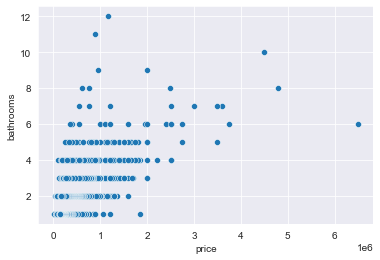

In [1500]:
# Plot a scatterplot of bathrooms against price with no outliers removed
sns.scatterplot(x='price',
                y = 'bathrooms',
                data = properties)
plt.show()

# Look at the data with outlier removal

In [1501]:
# Create a dataframe that removes outliers in the ways mentioned above then plot the same to correlation matrix and scatterplots
removedoutliers = properties[(properties['price'] < 575000) & (properties['nearest_station'] <=4 ) & (properties['bedrooms'] <= 6) &(properties['bathrooms'] <= 3)]
# No properties greater than 575000
# No properties that have a station more than 4 miles away
# No properties that have more than 6 bedrooms and more than 3 bathrooms

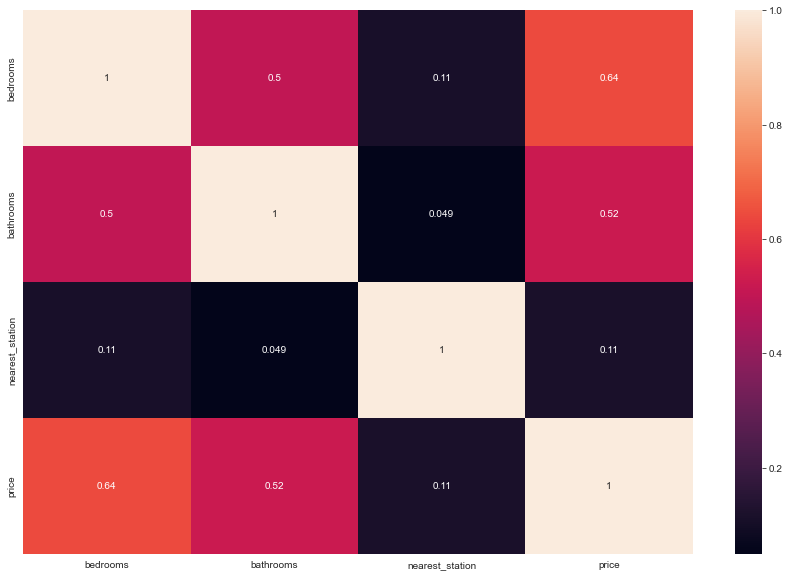

In [1502]:
# Plot a correlation heatmap with specified outliers removed
plt.figure(figsize = (15, 10))
sns.heatmap(removedoutliers.corr(), annot = True)
plt.show()

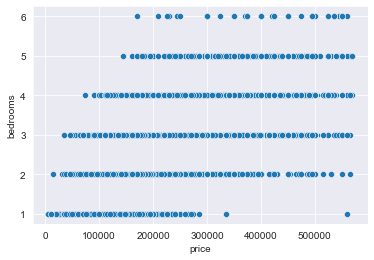

In [1503]:
# Plot a scatterplot of bedrooms against price with no outliers removed
sns.scatterplot(x='price',
                y = 'bedrooms',
                data = removedoutliers)
plt.show()

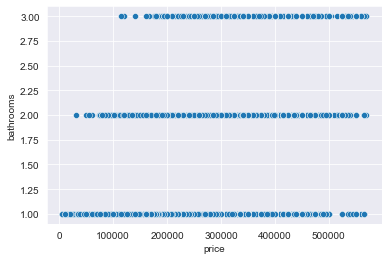

In [1504]:
# Plot a scatterplot of bedrooms against price with no outliers removed
sns.scatterplot(x='price',
                y = 'bathrooms',
                data = removedoutliers)
plt.show()

## Capping the following outliers decreases the correlation between bedrooms and price, whilst also decreasing the correlation between bathrooms and price

## Further boxing the data/model

- I want this model to make predictions for the prices of Detached, Semi-detached and Terraced properties which are Freehold
- Need to change the data to reflect this further
- Furthermore, the location of the property currently can't be utilised by this model
- I'm going to acquire all the postcode outcodes for each address so that they can be one hot encoded and carrying significance when training the model
- The data means the model will make price predictions for properties with a value between £0-£575000, have a station 0 upto 4 miles away, have between 1 and 6 bedrooms and between 1 and 3 bathrooms

In [1505]:
properties2 = properties[properties['tenure'] == 'Freehold'] #Only freehold properties
# Only Detached, Semi-Detached or Terraced
properties2 = properties2[(properties2['property_type'] == 'Detached') | (properties2['property_type'] == 'Semi-Detached') | (properties2['property_type'] == 'Terraced')]
# Removal of outliers
properties2 = properties2[(properties2['price'] < 575000) & (properties2['nearest_station'] <=4 ) & (properties2['bedrooms'] <= 6) & (properties2['bathrooms'] <= 3)]
properties2

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price
110,https://www.rightmove.co.uk/properties/1315844...,"Queen Square, Leeds",Detached,5,2,Freehold,0.7,550000
120,https://www.rightmove.co.uk/properties/8604795...,"Archery Road, Leeds, West Yorkshire",Terraced,5,1,Freehold,1.0,325000
175,https://www.rightmove.co.uk/properties/1326138...,"Hanover Square, Leeds",Terraced,6,3,Freehold,0.8,450000
198,https://www.rightmove.co.uk/properties/1311469...,"Burley Wood Crescent, Burley, LEEDS",Terraced,3,1,Freehold,0.5,220000
199,https://www.rightmove.co.uk/properties/1322668...,"The Village Street, Burley, Leeds",Detached,5,2,Freehold,0.2,325000
...,...,...,...,...,...,...,...,...
10470,https://www.rightmove.co.uk/properties/1328121...,"Royds Avenue, New Mill, Holmfirth, West Yorksh...",Terraced,3,1,Freehold,1.5,160000
10474,https://www.rightmove.co.uk/properties/1328843...,"Greenhill Bank Road, New Mill, Holmfirth, West...",Terraced,2,1,Freehold,1.6,150000
10475,https://www.rightmove.co.uk/properties/1281187...,"Thick Hollins, Meltham, Holmfirth, West Yorksh...",Terraced,2,1,Freehold,2.8,150000
10476,https://www.rightmove.co.uk/properties/1328625...,"Holmclose, Holmbridge, Holmfirth, West Yorkshi...",Semi-Detached,2,1,Freehold,3.4,150000


In [1506]:
# The number of rows after cleaning and removal of outliers
len(properties2)

4562

In [1507]:
# Do a describe on the data so far
properties2.describe()

,bedrooms,bathrooms,nearest_station,price
count,4562.000000,4562.000000,4562.00000,4562.000000
mean,3.181061,1.454187,1.37683,269313.568172
std,0.878554,0.640811,0.84642,115180.075669
min,1.000000,1.000000,0.00000,10000.000000
25%,3.000000,1.000000,0.70000,180000.000000
50%,3.000000,1.000000,1.20000,250000.000000
75%,4.000000,2.000000,1.90000,350000.000000
max,6.000000,3.000000,4.00000,570000.000000


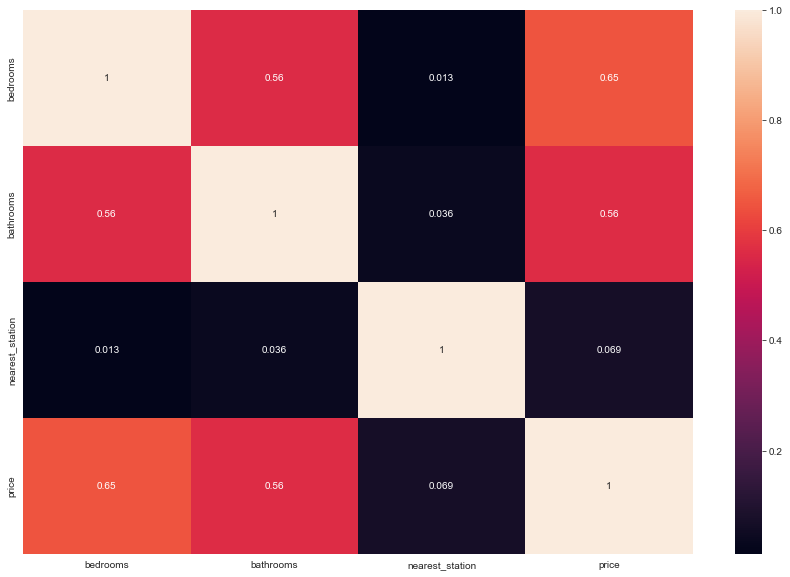

In [1508]:
# Plot a correlation heatmap with specified outliers removed
# Strong positive correlation between bedrooms and price
# Also strong positive correlation bathroons and price
# Very weak correlation between nearest_station and price, may not be worthwhile using for training the model
plt.figure(figsize = (15, 10))
sns.heatmap(properties2.corr(), annot = True)
plt.show()

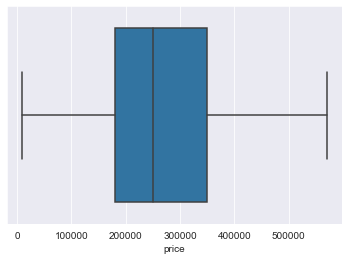

In [1509]:
# Do a box plot for price
sns.boxplot(data=properties2, x='price')
plt.show()

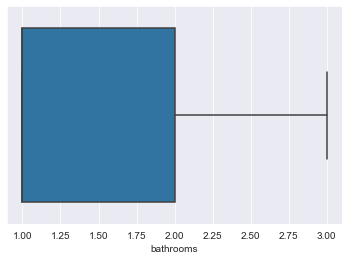

In [1510]:
# Do a box plot for bathrooms
sns.boxplot(data=properties2, x='bathrooms')
plt.show()

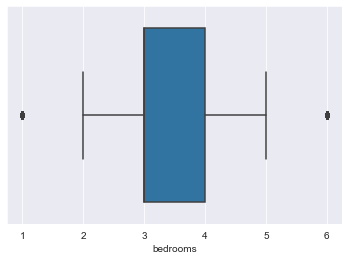

In [1511]:
# Do a box plot for bedrooms
# There are outliers presented by the data but I do want the model to train from rows of data that have 1 or 6 bedrooms
sns.boxplot(data=properties2, x='bedrooms')
plt.show()

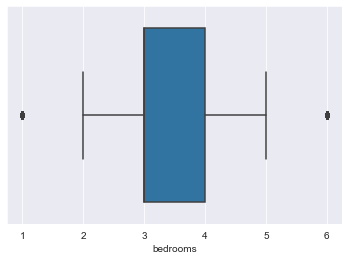

In [1512]:
# Do a box plot for bedrooms
sns.boxplot(data=properties2, x='bedrooms')
plt.show()

## Want to have additional features

- I believe certain postcode outcodes will have an effect on the price, those outcodes that are further away from the city centre, I believe will cause an increase in price
- However noticed that a lot of the addresses don't have postcodes in them
- This is bad as I would like to have a column of postcode outcodes
- I will utilise GeoPy to do this but first I will need to clean the addresses using regex

Tutorials read and documentation referenced:

https://geopy.readthedocs.io/en/stable/
https://www.geeksforgeeks.org/get-zip-code-with-given-location-using-geopy-in-python/
https://peterhaas-me.medium.com/how-to-geocode-with-python-and-pandas-4cd1d717d3f7

In [1513]:
# Need to create a column of postcode outcodes
# Going to scan through to see properties that have weird strings
properties2.reset_index(drop=True, inplace=True)
properties2

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price
0,https://www.rightmove.co.uk/properties/1315844...,"Queen Square, Leeds",Detached,5,2,Freehold,0.7,550000
1,https://www.rightmove.co.uk/properties/8604795...,"Archery Road, Leeds, West Yorkshire",Terraced,5,1,Freehold,1.0,325000
2,https://www.rightmove.co.uk/properties/1326138...,"Hanover Square, Leeds",Terraced,6,3,Freehold,0.8,450000
3,https://www.rightmove.co.uk/properties/1311469...,"Burley Wood Crescent, Burley, LEEDS",Terraced,3,1,Freehold,0.5,220000
4,https://www.rightmove.co.uk/properties/1322668...,"The Village Street, Burley, Leeds",Detached,5,2,Freehold,0.2,325000
...,...,...,...,...,...,...,...,...
4557,https://www.rightmove.co.uk/properties/1328121...,"Royds Avenue, New Mill, Holmfirth, West Yorksh...",Terraced,3,1,Freehold,1.5,160000
4558,https://www.rightmove.co.uk/properties/1328843...,"Greenhill Bank Road, New Mill, Holmfirth, West...",Terraced,2,1,Freehold,1.6,150000
4559,https://www.rightmove.co.uk/properties/1281187...,"Thick Hollins, Meltham, Holmfirth, West Yorksh...",Terraced,2,1,Freehold,2.8,150000
4560,https://www.rightmove.co.uk/properties/1328625...,"Holmclose, Holmbridge, Holmfirth, West Yorkshi...",Semi-Detached,2,1,Freehold,3.4,150000


In [1514]:
## Regex clean function, replaces regex found with whitespace
def regex_clean(txt, regex):
    """Replace any text matching the regex

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove matches
    regex : string
        A text string of the regex pattern you want to match

    Returns
    -------
    The same txt string with the matches removes
    """

    return " ".join(re.sub(regex, " ", txt).split())

In [1515]:
def prep_clean_address(address):
    """
    Cleans up an address by regex cleaning it

    Parameters
    ----------
    address : string
        A text string representing an address that you want to apply cleaning to

    Returns
    -------
    address: string
    Cleaned up string - contractions expanded, lower cased and regex cleaned
    """

    ## Regex cleaning, finding the matching regex and replace with white space
    address = regex_clean(address, r'[\r\n]') # Remove the \r\n in some strings
    address = regex_clean(address, r'\/') # Remove forward slashes between strings
    return address

In [1516]:
# Some addresses have this \r\n situation
properties2['address'].loc[352]

'Cliff Oaks\r\nFawcett Lane\r\nLeeds\r\nLS12 4FG'

In [1517]:
# Some addresses have a forward slash between words
properties2['address'].loc[10]

'Eden Crescent, Burley/Headingley border, Leeds, West Yorkshire'

In [1518]:
# Apply the regex cleaning on the whole column to create a new column
properties2['cleaned_address'] = properties2['address'].apply(prep_clean_address)

In [1519]:
# Have a check it's cleaned / slashes
properties2.loc[10]

url                https://www.rightmove.co.uk/properties/1320727...
address            Eden Crescent, Burley/Headingley border, Leeds...
property_type                                          Semi-Detached
bedrooms                                                           3
bathrooms                                                          1
tenure                                                      Freehold
nearest_station                                                  0.1
price                                                         239500
cleaned_address    Eden Crescent, Burley Headingley border, Leeds...
Name: 10, dtype: object

In [1520]:
# Have a check it's cleaned '\r\n'
properties2.loc[352]

url                https://www.rightmove.co.uk/properties/1322619...
address              Cliff Oaks\r\nFawcett Lane\r\nLeeds\r\nLS12 4FG
property_type                                          Semi-Detached
bedrooms                                                           3
bathrooms                                                          3
tenure                                                      Freehold
nearest_station                                                  1.3
price                                                         350000
cleaned_address               Cliff Oaks Fawcett Lane Leeds LS12 4FG
Name: 352, dtype: object

In [1521]:
!pip install geopy

In [1522]:
# import module
from geopy.geocoders import Nominatim
# initialize Nominatim API
geolocator = Nominatim(user_agent="myGeolocator", timeout=1)

In [1523]:
# Create a small dataframe to learn about geopy and geocode method
gcodetest = properties2.head()

In [1524]:
# Observe mini dataframe
gcodetest

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address
0,https://www.rightmove.co.uk/properties/1315844...,"Queen Square, Leeds",Detached,5,2,Freehold,0.7,550000,"Queen Square, Leeds"
1,https://www.rightmove.co.uk/properties/8604795...,"Archery Road, Leeds, West Yorkshire",Terraced,5,1,Freehold,1.0,325000,"Archery Road, Leeds, West Yorkshire"
2,https://www.rightmove.co.uk/properties/1326138...,"Hanover Square, Leeds",Terraced,6,3,Freehold,0.8,450000,"Hanover Square, Leeds"
3,https://www.rightmove.co.uk/properties/1311469...,"Burley Wood Crescent, Burley, LEEDS",Terraced,3,1,Freehold,0.5,220000,"Burley Wood Crescent, Burley, LEEDS"
4,https://www.rightmove.co.uk/properties/1322668...,"The Village Street, Burley, Leeds",Detached,5,2,Freehold,0.2,325000,"The Village Street, Burley, Leeds"


In [1525]:
# Apply geocode method on cleaned address
gcodetest['gcode'] = gcodetest['cleaned_address'].apply(geolocator.geocode)

C:\Users\haide\AppData\Local\Temp/ipykernel_68452/2129216075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcodetest['gcode'] = gcodetest['cleaned_address'].apply(geolocator.geocode)


In [1526]:
# Look at the geocode column
gcodetest.head()

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode
0,https://www.rightmove.co.uk/properties/1315844...,"Queen Square, Leeds",Detached,5,2,Freehold,0.7,550000,"Queen Square, Leeds","(Queen Square, Arena Quarter, Lovell Park, Lee..."
1,https://www.rightmove.co.uk/properties/8604795...,"Archery Road, Leeds, West Yorkshire",Terraced,5,1,Freehold,1.0,325000,"Archery Road, Leeds, West Yorkshire","(Archery Road, Arena Quarter, Woodhouse, Leeds..."
2,https://www.rightmove.co.uk/properties/1326138...,"Hanover Square, Leeds",Terraced,6,3,Freehold,0.8,450000,"Hanover Square, Leeds","(Hanover Square, Hyde Park, Leeds, West Yorksh..."
3,https://www.rightmove.co.uk/properties/1311469...,"Burley Wood Crescent, Burley, LEEDS",Terraced,3,1,Freehold,0.5,220000,"Burley Wood Crescent, Burley, LEEDS","(Burley Wood Crescent, Burley, Leeds, West Yor..."
4,https://www.rightmove.co.uk/properties/1322668...,"The Village Street, Burley, Leeds",Detached,5,2,Freehold,0.2,325000,"The Village Street, Burley, Leeds","(The Village Street, Burley, Leeds, West Yorks..."


In [1527]:
# Observe the return of a Location object
# Structured as such, (address<String>, (latitude<Float>, longitude<Float>))
gcodetest['gcode'].loc[0]

Location(Queen Square, Arena Quarter, Lovell Park, Leeds, West Yorkshire, England, United Kingdom, (53.80349235, -1.5452538469202475, 0.0))

In [1528]:
# Documentation says it can also be accessed like this:
# location.address, location.latitude, location.longitude, location.altitude, and location.raw.
# The last contains the full geocoder’s response for this result.
gcodetest['lat'] = [g.latitude for g in gcodetest.gcode]
gcodetest['long'] = [g.longitude for g in gcodetest.gcode]

C:\Users\haide\AppData\Local\Temp/ipykernel_68452/823163388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcodetest['lat'] = [g.latitude for g in gcodetest.gcode]
C:\Users\haide\AppData\Local\Temp/ipykernel_68452/823163388.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcodetest['long'] = [g.longitude for g in gcodetest.gcode]


In [1529]:
# Look at the longtitude and latitude columns added to the dataframe
gcodetest

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,lat,long
0,https://www.rightmove.co.uk/properties/1315844...,"Queen Square, Leeds",Detached,5,2,Freehold,0.7,550000,"Queen Square, Leeds","(Queen Square, Arena Quarter, Lovell Park, Lee...",53.803492,-1.545254
1,https://www.rightmove.co.uk/properties/8604795...,"Archery Road, Leeds, West Yorkshire",Terraced,5,1,Freehold,1.0,325000,"Archery Road, Leeds, West Yorkshire","(Archery Road, Arena Quarter, Woodhouse, Leeds...",53.808283,-1.549246
2,https://www.rightmove.co.uk/properties/1326138...,"Hanover Square, Leeds",Terraced,6,3,Freehold,0.8,450000,"Hanover Square, Leeds","(Hanover Square, Hyde Park, Leeds, West Yorksh...",53.801709,-1.560476
3,https://www.rightmove.co.uk/properties/1311469...,"Burley Wood Crescent, Burley, LEEDS",Terraced,3,1,Freehold,0.5,220000,"Burley Wood Crescent, Burley, LEEDS","(Burley Wood Crescent, Burley, Leeds, West Yor...",53.810116,-1.591328
4,https://www.rightmove.co.uk/properties/1322668...,"The Village Street, Burley, Leeds",Detached,5,2,Freehold,0.2,325000,"The Village Street, Burley, Leeds","(The Village Street, Burley, Leeds, West Yorks...",53.810029,-1.582223


In [1530]:
# Access the address for a property
gcodetest.loc[4]['gcode'].address

'The Village Street, Burley, Leeds, West Yorkshire, England, LS4 2PR, United Kingdom'

In [1531]:
# Can get the address by splitting the address and accessing the appropriate index
# This won't always be the Outcode
gcodetest.loc[4]['gcode'].address.split()[-4]

'LS4'

In [1532]:
# Create a column of Outcodes
gcodetest['Outcode'] =[g.address.split()[-4] for g in gcodetest.gcode]

C:\Users\haide\AppData\Local\Temp/ipykernel_68452/1472400905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcodetest['Outcode'] =[g.address.split()[-4] for g in gcodetest.gcode]


In [1533]:
# Observe the column of Outcodes
# Can see the first address it couldn't find an Outcode
# I can go and manually clean columns and set them to none if it doesn't get the correct or appropriate Outcode
gcodetest['Outcode']

0    Yorkshire,
1           LS2
2           LS3
3           LS4
4           LS4
Name: Outcode, dtype: object

## Attempt getting all the postcode outcodes for every address

In [1534]:
# Row 3002 is causing issues when trying calling the geocode function
properties2[properties2['address'].str.contains('South Street')]

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address
1836,https://www.rightmove.co.uk/properties/1252902...,"South Street, Oakenshaw, Bradford, BD12",Detached,3,1,Freehold,0.5,225000,"South Street, Oakenshaw, Bradford, BD12"
2375,https://www.rightmove.co.uk/properties/1077552...,"South Street, Gargrave, Skipton, North Yorkshi...",Terraced,3,2,Freehold,0.3,240000,"South Street, Gargrave, Skipton, North Yorkshi..."
3002,https://www.rightmove.co.uk/properties/1301269...,"South Street, Normanton, WF6",Semi-Detached,6,3,Freehold,0.9,300000,"South Street, Normanton, WF6"
3241,https://www.rightmove.co.uk/properties/1250835...,"South Street, Hemsworth, Pontefract, West York...",Detached,3,1,Freehold,2.0,200000,"South Street, Hemsworth, Pontefract, West York..."
4300,https://www.rightmove.co.uk/properties/1319565...,"South Street, brighouse",Terraced,2,1,Freehold,1.6,89995,"South Street, brighouse"


In [1536]:
properties2.at[3002, 'address'] = 'South Street, Normanton'

In [1537]:
properties2.loc[3002]['address']

'South Street, Normanton'

In [1393]:
# Making a lot of requests - need to include this to add delays between geocoding calls, retry failed requests and swallow erros for individual rows
from geopy.extra.rate_limiter import RateLimiter

In [1538]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="GettingOutcodes", timeout=None)
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1.0, error_wait_seconds=2.0, swallow_exceptions=True, return_value_on_exception=None)
# Apply geocode method on cleaned address for whole dataset
properties2['gcode'] = properties2['cleaned_address'].apply(geolocator.geocode)

In [1540]:
# See if the gcode column has been appended
properties2.head()

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode
0,https://www.rightmove.co.uk/properties/1315844...,"Queen Square, Leeds",Detached,5,2,Freehold,0.7,550000,"Queen Square, Leeds","(Queen Square, Arena Quarter, Lovell Park, Lee..."
1,https://www.rightmove.co.uk/properties/8604795...,"Archery Road, Leeds, West Yorkshire",Terraced,5,1,Freehold,1.0,325000,"Archery Road, Leeds, West Yorkshire","(Archery Road, Arena Quarter, Woodhouse, Leeds..."
2,https://www.rightmove.co.uk/properties/1326138...,"Hanover Square, Leeds",Terraced,6,3,Freehold,0.8,450000,"Hanover Square, Leeds","(Hanover Square, Hyde Park, Leeds, West Yorksh..."
3,https://www.rightmove.co.uk/properties/1311469...,"Burley Wood Crescent, Burley, LEEDS",Terraced,3,1,Freehold,0.5,220000,"Burley Wood Crescent, Burley, LEEDS","(Burley Wood Crescent, Burley, Leeds, West Yor..."
4,https://www.rightmove.co.uk/properties/1322668...,"The Village Street, Burley, Leeds",Detached,5,2,Freehold,0.2,325000,"The Village Street, Burley, Leeds","(The Village Street, Burley, Leeds, West Yorks..."


In [1541]:
# Considerable amount of nulls for gcode
null_vals(properties2)

,null,percent
gcode,1315,28.825
url,0,0.000
address,0,0.000
property_type,0,0.000
bedrooms,0,0.000
bathrooms,0,0.000
tenure,0,0.000
nearest_station,0,0.000
price,0,0.000
cleaned_address,0,0.000


In [1397]:
# Save this dataframe to a csv - Don't want to run the geopy code again - took about 40 minutes
# properties2.to_csv('properties2.csv', index=False)

In [1542]:
# Function to add rows where the value of postcode outcode is known
def get_outcode_from_gcode(locationObj):
    if locationObj != None:
        return locationObj.address.split()[-4]
    else:
        return None

In [1543]:
# Create a column of outcodes that have been retrieved via the geocode method
properties2['outcode_from_gcode'] = properties2['gcode'].apply(get_outcode_from_gcode)

In [1544]:
# Observe the column outcode from gcode
# Some error values as expected
properties2.head()

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode
0,https://www.rightmove.co.uk/properties/1315844...,"Queen Square, Leeds",Detached,5,2,Freehold,0.7,550000,"Queen Square, Leeds","(Queen Square, Arena Quarter, Lovell Park, Lee...","Yorkshire,"
1,https://www.rightmove.co.uk/properties/8604795...,"Archery Road, Leeds, West Yorkshire",Terraced,5,1,Freehold,1.0,325000,"Archery Road, Leeds, West Yorkshire","(Archery Road, Arena Quarter, Woodhouse, Leeds...",LS2
2,https://www.rightmove.co.uk/properties/1326138...,"Hanover Square, Leeds",Terraced,6,3,Freehold,0.8,450000,"Hanover Square, Leeds","(Hanover Square, Hyde Park, Leeds, West Yorksh...",LS3
3,https://www.rightmove.co.uk/properties/1311469...,"Burley Wood Crescent, Burley, LEEDS",Terraced,3,1,Freehold,0.5,220000,"Burley Wood Crescent, Burley, LEEDS","(Burley Wood Crescent, Burley, Leeds, West Yor...",LS4
4,https://www.rightmove.co.uk/properties/1322668...,"The Village Street, Burley, Leeds",Detached,5,2,Freehold,0.2,325000,"The Village Street, Burley, Leeds","(The Village Street, Burley, Leeds, West Yorks...",LS4


In [1545]:
# The number of nulls for the outcode_from_gcode column will be the same as that for the number of nulls for gcode
null_vals(properties2)

,null,percent
gcode,1315,28.825
outcode_from_gcode,1315,28.825
url,0,0.000
address,0,0.000
property_type,0,0.000
bedrooms,0,0.000
bathrooms,0,0.000
tenure,0,0.000
nearest_station,0,0.000
price,0,0.000


## Create a column of outcodes acquired from the address

In [1551]:
def find_postcodes_in_address(data):
    """
    A function that finds the outcode from the address
    :param data: A dataframe to apply the match_postcode_in_address() function to
    :return: A dataframe with an outcode_from_address column and value for each row
    """
    data['outcode_address'] = data.apply(match_postcodes_in_address, axis=1)
    return data

In [1552]:
def match_postcodes_in_address(row):
    """
    Function to see if the cleaned address column for rows has an outcode
    Then return that outcode and assign it to the row
    :param row: A row of a dataframe
    :return 1 or NaN: Returns the outcode for an address if it contains one, otherwise returns None
    """
    address = row['cleaned_address']

    # Regexes for outcodes for leeds, huddersfield
    outcode_regexes = [r'LS\d{1,2}', r'HD\d{1,2}', r'HX\d{1,2}', r'WF\d{1,2}', r'BD\d{1,2}']

    ldsmatch = re.findall(outcode_regexes[0], address)
    hudsmatch = re.findall(outcode_regexes[1], address)
    hfxmatch = re.findall(outcode_regexes[2], address)
    wfmatch = re.findall(outcode_regexes[3], address)
    bdmatch = re.findall(outcode_regexes[4], address)

    if ldsmatch:
        return ldsmatch[0]
    elif hudsmatch:
        return hudsmatch[0]
    elif hfxmatch:
        return  hfxmatch[0]
    elif wfmatch:
        return wfmatch[0]
    elif bdmatch:
        return bdmatch[0]
    else:
        return None

In [1553]:
# Let's see if I can reduce the number of null outcodes
properties2 = find_postcodes_in_address(properties2)

In [1557]:
# Rows where the outcode was also located within the address
# 2002 rows
properties2[properties2['outcode_address'].notna()]

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
8,https://www.rightmove.co.uk/properties/1285506...,"Lumley Avenue, Leeds, West Yorkshire, LS4",Terraced,4,2,Freehold,0.1,250000,"Lumley Avenue, Leeds, West Yorkshire, LS4","(Lumley Avenue, Burley, Leeds, West Yorkshire,...",LS4,LS4
11,https://www.rightmove.co.uk/properties/1327622...,"Kirkstall Road, Leeds, LS4 2QD",Semi-Detached,3,1,Freehold,0.6,235000,"Kirkstall Road, Leeds, LS4 2QD","(Kirkstall Road, Burley, Leeds, West Yorkshire...",LS4,LS4
12,https://www.rightmove.co.uk/properties/1317795...,"Burley Wood Crescent, Leeds, LS4 2QQ",Terraced,3,1,Freehold,0.5,230000,"Burley Wood Crescent, Leeds, LS4 2QQ","(Burley Wood Crescent, Burley, Leeds, West Yor...",LS4,LS4
17,https://www.rightmove.co.uk/properties/1328079...,"Haddon Avenue, Leeds, LS4",Terraced,2,1,Freehold,0.4,180000,"Haddon Avenue, Leeds, LS4","(Haddon Avenue, Burley, Leeds, West Yorkshire,...",LS4,LS4
19,https://www.rightmove.co.uk/properties/1311390...,"Morris Grove, Leeds, LS5",Terraced,2,1,Freehold,0.2,240000,"Morris Grove, Leeds, LS5","(Morris Grove, Kirkstall, Leeds, West Yorkshir...",LS5,LS5
...,...,...,...,...,...,...,...,...,...,...,...,...
4557,https://www.rightmove.co.uk/properties/1328121...,"Royds Avenue, New Mill, Holmfirth, West Yorksh...",Terraced,3,1,Freehold,1.5,160000,"Royds Avenue, New Mill, Holmfirth, West Yorksh...",None,None,HD9
4558,https://www.rightmove.co.uk/properties/1328843...,"Greenhill Bank Road, New Mill, Holmfirth, West...",Terraced,2,1,Freehold,1.6,150000,"Greenhill Bank Road, New Mill, Holmfirth, West...",None,None,HD9
4559,https://www.rightmove.co.uk/properties/1281187...,"Thick Hollins, Meltham, Holmfirth, West Yorksh...",Terraced,2,1,Freehold,2.8,150000,"Thick Hollins, Meltham, Holmfirth, West Yorksh...",None,None,HD9
4560,https://www.rightmove.co.uk/properties/1328625...,"Holmclose, Holmbridge, Holmfirth, West Yorkshi...",Semi-Detached,2,1,Freehold,3.4,150000,"Holmclose, Holmbridge, Holmfirth, West Yorkshi...",None,None,HD9


In [1581]:
# See the percentage of outcodes that were not able to be acquired from the address
null_vals(properties2)

,null,percent
outcode_address,2556,56.028
gcode,1315,28.825
outcode_from_gcode,1315,28.825
url,0,0.000
address,0,0.000
property_type,0,0.000
bedrooms,0,0.000
bathrooms,0,0.000
tenure,0,0.000
nearest_station,0,0.000


In [1582]:
properties3copy = properties2.copy()

In [1583]:
# If there are nulls for the outcode_address column but the value is present in the outcode_from_gcode column
# Replace the null with the outcode from the outcode_from_gcode column
properties3copy['outcode_address'] = properties3copy['outcode_address'].fillna(properties3copy['outcode_from_gcode'])

In [1584]:
# Check the number of nulls that are now remaining in the outcode_address column
null_vals(properties3copy)

,null,percent
gcode,1315,28.825
outcode_from_gcode,1315,28.825
outcode_address,553,12.122
url,0,0.000
address,0,0.000
property_type,0,0.000
bedrooms,0,0.000
bathrooms,0,0.000
tenure,0,0.000
nearest_station,0,0.000


In [1586]:
# Can see that geocode hasn't been perfect in getting the postcode
properties3copy['outcode_address'].value_counts()

WF4               141
WF2               136
LS15              119
LS25              103
WF10              102
                 ... 
HX37                1
S5                  1
B37                 1
Massachusetts,      1
L23                 1
Name: outcode_address, Length: 99, dtype: int64

## Manually fix listings that have the incorrect outcode by looking at the map section of the listing online on rightmove site

In [1587]:
# Correct those that have incorrectly been identified as Yorkshire for the outcode
properties3copy[properties3copy['outcode_address'] == 'Yorkshire,']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
0,https://www.rightmove.co.uk/properties/1315844...,"Queen Square, Leeds",Detached,5,2,Freehold,0.7,550000,"Queen Square, Leeds","(Queen Square, Arena Quarter, Lovell Park, Lee...","Yorkshire,","Yorkshire,"
446,https://www.rightmove.co.uk/properties/1302277...,"The Rowans, Leeds",Detached,4,2,Freehold,0.8,300000,"The Rowans, Leeds","(The Rowans, Howlett Cross, Robin Hood, Leeds,...","Yorkshire,","Yorkshire,"
521,https://www.rightmove.co.uk/properties/1253795...,"Ringwood Crescent, Leeds",Semi-Detached,4,2,Freehold,2.3,340000,"Ringwood Crescent, Leeds","(Ringwood Crescent, Monkswood, Leeds, West Yor...","Yorkshire,","Yorkshire,"
535,https://www.rightmove.co.uk/properties/1327336...,"The Oval, Leeds",Semi-Detached,3,2,Freehold,0.9,240000,"The Oval, Leeds","(The Oval, White Cross, Tranmere Park, Guisele...","Yorkshire,","Yorkshire,"
1210,https://www.rightmove.co.uk/properties/1316095...,"Embleton Road, Methley, LEEDS",Semi-Detached,3,1,Freehold,2.1,210000,"Embleton Road, Methley, LEEDS","(Embleton Road, Methley Junction, Leeds, West ...","Yorkshire,","Yorkshire,"
1790,https://www.rightmove.co.uk/properties/1319254...,"Yewdall Way, Bradford",Semi-Detached,3,1,Freehold,1.3,170000,"Yewdall Way, Bradford","(Yewdall Way, Eccleshill, Bradford, West Yorks...","Yorkshire,","Yorkshire,"
2459,https://www.rightmove.co.uk/properties/1325134...,"Victoria Way, Outwood, Wakefield",Semi-Detached,3,1,Freehold,0.7,220000,"Victoria Way, Outwood, Wakefield","(Victoria Way, Outwood, Newton Hill, Wakefield...","Yorkshire,","Yorkshire,"
2943,https://www.rightmove.co.uk/properties/1323724...,"Teall Court, Ossett",Detached,3,1,Freehold,2.2,279950,"Teall Court, Ossett","(Teall Court, Ossett, Wakefield, West Yorkshir...","Yorkshire,","Yorkshire,"
3315,https://www.rightmove.co.uk/properties/1322764...,"Churchfield Lane, Castleford",Detached,5,1,Freehold,0.6,280000,"Churchfield Lane, Castleford","(Churchfield Lane, Glasshoughton, Castleford, ...","Yorkshire,","Yorkshire,"
3321,https://www.rightmove.co.uk/properties/1289001...,"Churchfield Lane, Castleford",Detached,3,1,Freehold,0.8,270000,"Churchfield Lane, Castleford","(Churchfield Lane, Glasshoughton, Castleford, ...","Yorkshire,","Yorkshire,"


In [1588]:
# Corrections for when the address has been incorrectly noted as Yorkshire
properties3copy.at[0, 'outcode_address'] = 'LS2'
properties3copy.at[446, 'outcode_address'] = 'LS13'
properties3copy.at[521, 'outcode_address'] = 'LS14'
properties3copy.at[535, 'outcode_address'] = 'LS14'
properties3copy.at[1210, 'outcode_address'] = 'LS26'
properties3copy.at[1790, 'outcode_address'] = 'BD10'
properties3copy.at[2459, 'outcode_address'] = 'WF1'
properties3copy.at[2943, 'outcode_address'] = 'WF5'
properties3copy.at[3315, 'outcode_address'] = 'WF10'
properties3copy.at[3321, 'outcode_address'] = 'WF10'
properties3copy.at[3335, 'outcode_address'] = 'WF10'
properties3copy.at[3374, 'outcode_address'] = 'WF10'

In [1589]:
# Check this has been corrected properly
properties3copy[properties3copy['outcode_address'] == 'Yorkshire,']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address


In [1593]:
# Other things that aren't correct
# NN16
# S75
# G12
# SK15
# LA2
# South
# DE7
# "Corporation,"
# HX37
# S5
# B37
# "Massachusetts,"
# L23

properties3copy[properties3copy['outcode_address'] == 'NN16']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
1886,https://www.rightmove.co.uk/properties/1259277...,2 Brambleside Crescent,Semi-Detached,4,2,Freehold,3.8,249950,2 Brambleside Crescent,"(2, Gardeners Crescent, Brambleside, Kettering...",NN16,NN16
1887,https://www.rightmove.co.uk/properties/1259277...,6 Brambleside,Semi-Detached,4,3,Freehold,3.8,249950,6 Brambleside,"(6, Brambleside, Kettering, North Northamptons...",NN16,NN16


In [1594]:
# Sort the properties above
properties3copy.at[1886, 'outcode_address'] = 'BD13'
properties3copy.at[1887, 'outcode_address'] = 'BD13'

In [1595]:
properties3copy[properties3copy['outcode_address'] == 'S75']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
2477,https://www.rightmove.co.uk/properties/1244855...,"Barnsley Road, Wakefield",Terraced,3,2,Freehold,0.3,170000,"Barnsley Road, Wakefield","(Barnsley Road, Notton, Woolley, Wakefield, We...",S75,S75
2522,https://www.rightmove.co.uk/properties/1320303...,"Barnsley Road, Wakefield",Semi-Detached,4,2,Freehold,1.2,400000,"Barnsley Road, Wakefield","(Barnsley Road, Notton, Woolley, Wakefield, We...",S75,S75


In [1596]:
# Sort the properties above
properties3copy.at[2477, 'outcode_address'] = 'WF1'
properties3copy.at[2522, 'outcode_address'] = 'WF2'

In [1597]:
properties3copy[properties3copy['outcode_address'] == 'G12']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
2551,https://www.rightmove.co.uk/properties/1300372...,Plot 2 Crown Gardens,Semi-Detached,3,2,Freehold,1.3,317500,Plot 2 Crown Gardens,"(Crown Gardens, Partickhill, Dowanhill, Glasgo...",G12,G12


In [1598]:
# Sort the properties above
properties3copy.at[2551, 'outcode_address'] = 'WF1'

In [1599]:
properties3copy[properties3copy['outcode_address'] == 'SK15']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
3984,https://www.rightmove.co.uk/properties/1315246...,"St. James Road, Huddersfield",Terraced,2,1,Freehold,0.9,160000,"St. James Road, Huddersfield","(St James, Huddersfield Road, Brushes, Millbro...",SK15,SK15


In [1600]:
# Sort the properties above
properties3copy.at[3984, 'outcode_address'] = 'HD1'

In [1601]:
properties3copy[properties3copy['outcode_address'] == 'LA2']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
1021,https://www.rightmove.co.uk/properties/1276588...,"Hillam Lane, Hillam",Detached,4,3,Freehold,2.3,450000,"Hillam Lane, Hillam","(Hillam Lane, Hillam, Cockerham, Lancaster, La...",LA2,LA2


In [1602]:
# Sort the properties above
properties3copy.at[1021, 'outcode_address'] = 'LS25'

In [1603]:
properties3copy[properties3copy['outcode_address'] == 'South']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
1889,https://www.rightmove.co.uk/properties/1281866...,"High Street, Thornton",Semi-Detached,4,1,Freehold,3.8,240000,"High Street, Thornton","(High Street, Thornton, Penrith, Sydney, Penri...",South,South


In [1604]:
# Sort the properties above
properties3copy.at[1889, 'outcode_address'] = 'BD13'

In [1605]:
properties3copy[properties3copy['outcode_address'] == 'DE7']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
2151,https://www.rightmove.co.uk/properties/1324483...,"Vicarage Road, Shipley",Semi-Detached,4,1,Freehold,0.9,155000,"Vicarage Road, Shipley","(The Vicarage, 197, Heanor Road, Shipley View,...",DE7,DE7


In [1606]:
properties3copy.at[2151, 'outcode_address'] = 'BD18'

In [1607]:
properties3copy[properties3copy['outcode_address'] == 'Corporation,']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
2347,https://www.rightmove.co.uk/properties/1315703...,"Nelson Street, Cross Roads",Terraced,3,1,Freehold,2.7,145000,"Nelson Street, Cross Roads","(Nelson Street, Admiral Town, Cross Roads, Kin...","Corporation,","Corporation,"


In [1608]:
properties3copy.at[2347, 'outcode_address'] = 'BD22'

In [1609]:
properties3copy[properties3copy['outcode_address'] == 'HX37']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
3831,https://www.rightmove.co.uk/properties/1271181...,St James Sq HX37HL and Back Clough HX37HH,Terraced,1,1,Freehold,1.7,137150,St James Sq HX37HL and Back Clough HX37HH,None,None,HX37


In [1610]:
properties3copy.at[3831, 'outcode_address'] = 'HX3'

In [1612]:
properties3copy[properties3copy['outcode_address'] == 'S5']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
3786,https://www.rightmove.co.uk/properties/8569129...,"Norwood Green, Halifax",Semi-Detached,3,1,Freehold,1.6,400000,"Norwood Green, Halifax","(Southey Green Road/Halifax Road, Southey Gree...",S5,S5


In [1613]:
properties3copy.at[3786, 'outcode_address'] = 'HX3'

In [1614]:
properties3copy[properties3copy['outcode_address'] == 'B37']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
3746,https://www.rightmove.co.uk/properties/1295439...,"Green Way, Halifax",Semi-Detached,3,2,Freehold,3.2,200000,"Green Way, Halifax","(Halifax, Greenwood Way, Chelmsley Wood, Coles...",B37,B37


In [1616]:
properties3copy.at[3746, 'outcode_address'] = 'HX2'

In [1618]:
properties3copy[properties3copy['outcode_address'] == 'Massachusetts,']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
3740,https://www.rightmove.co.uk/properties/1308812...,"Beechwood Road, Halifax",Semi-Detached,3,1,Freehold,2.2,220000,"Beechwood Road, Halifax","(Beechwood Road, Halifax Mobile Home Estates, ...","Massachusetts,","Massachusetts,"


In [1619]:
properties3copy.at[3740, 'outcode_address'] = 'HX2'

In [1620]:
properties3copy[properties3copy['outcode_address'] == 'L23']

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode_address
1905,https://www.rightmove.co.uk/properties/1300989...,"Hillcrest Road, Thornton",Semi-Detached,3,1,Freehold,3.8,190000,"Hillcrest Road, Thornton","(Hillcrest Road, Great Crosby, Thornton, Sefto...",L23,L23


In [1621]:
properties3copy.at[1905, 'outcode_address'] = 'BD13'

In [1622]:
# Can see that the outcodes are all now valid leeds, bradford, halifax, huddersfield and wakefield outcodes
properties3copy['outcode_address'].value_counts()

WF4     141
WF2     137
LS15    119
WF10    106
LS25    104
       ... 
LS22      5
BD1       2
LS2       2
LS3       1
LS23      1
Name: outcode_address, Length: 85, dtype: int64

In [1623]:
# Rename the name of the outcode_address column now we have as many postcodes as possible acquired for it
properties3copy.rename(columns={'outcode_address': 'outcode'}, inplace=True)

In [1624]:
# Observe the change
properties3copy.head()

,url,address,property_type,bedrooms,bathrooms,tenure,nearest_station,price,cleaned_address,gcode,outcode_from_gcode,outcode
0,https://www.rightmove.co.uk/properties/1315844...,"Queen Square, Leeds",Detached,5,2,Freehold,0.7,550000,"Queen Square, Leeds","(Queen Square, Arena Quarter, Lovell Park, Lee...","Yorkshire,",LS2
1,https://www.rightmove.co.uk/properties/8604795...,"Archery Road, Leeds, West Yorkshire",Terraced,5,1,Freehold,1.0,325000,"Archery Road, Leeds, West Yorkshire","(Archery Road, Arena Quarter, Woodhouse, Leeds...",LS2,LS2
2,https://www.rightmove.co.uk/properties/1326138...,"Hanover Square, Leeds",Terraced,6,3,Freehold,0.8,450000,"Hanover Square, Leeds","(Hanover Square, Hyde Park, Leeds, West Yorksh...",LS3,LS3
3,https://www.rightmove.co.uk/properties/1311469...,"Burley Wood Crescent, Burley, LEEDS",Terraced,3,1,Freehold,0.5,220000,"Burley Wood Crescent, Burley, LEEDS","(Burley Wood Crescent, Burley, Leeds, West Yor...",LS4,LS4
4,https://www.rightmove.co.uk/properties/1322668...,"The Village Street, Burley, Leeds",Detached,5,2,Freehold,0.2,325000,"The Village Street, Burley, Leeds","(The Village Street, Burley, Leeds, West Yorks...",LS4,LS4


In [1625]:
# Look at the number of nulls left for outcode again
null_vals(properties3copy)

,null,percent
gcode,1315,28.825
outcode_from_gcode,1315,28.825
outcode,553,12.122
url,0,0.000
address,0,0.000
property_type,0,0.000
bedrooms,0,0.000
bathrooms,0,0.000
tenure,0,0.000
nearest_station,0,0.000


In [1626]:
# How many rows have an outcode value
properties3copy['outcode'].value_counts().sum()

4009

In [1627]:
# Save a copy of the dataframe now before dropping the nulls
# properties3copy.to_csv('properties_with_outcode_nulls.csv', index=False)

In [1628]:
# Let's drop rows with nulls from outcode column as 553 rows is a lot to manually go and retrieve by inspecting each listing
properties3copy.dropna(
    axis = 0,
    how = 'any',
    subset = ['outcode'],
    inplace = True
)

In [1643]:
# Can see no nulls now for outcode
null_vals(properties3copy)

,null,percent
gcode,762,19.007
outcode_from_gcode,762,19.007
url,0,0.000
address,0,0.000
property_type,0,0.000
bedrooms,0,0.000
bathrooms,0,0.000
tenure,0,0.000
nearest_station,0,0.000
price,0,0.000


In [1644]:
# Lets one hot encode the outcode column now and see if outcode has an effect on price
propertiesonehotencoded = pd.get_dummies(properties3copy, prefix='Outcode', columns=['outcode'])

In [1654]:
# Not worth doing a heatmap so will look at correlation matrix
# None show a strong correlation with price - that's a bit disappointing
propertiesonehotencoded.corr()

,bedrooms,bathrooms,nearest_station,price,Outcode_BD1,Outcode_BD10,Outcode_BD11,Outcode_BD12,Outcode_BD13,Outcode_BD14,...,Outcode_WF16,Outcode_WF17,Outcode_WF2,Outcode_WF3,Outcode_WF4,Outcode_WF5,Outcode_WF6,Outcode_WF7,Outcode_WF8,Outcode_WF9
bedrooms,1.000000,0.550568,0.006587,0.648043,0.046856,0.009056,-0.012682,0.000548,0.010639,0.009454,...,0.011214,0.011733,0.024937,0.016496,0.018964,-0.000514,-0.004686,0.040700,0.030236,0.001112
bathrooms,0.550568,1.000000,0.037405,0.557707,0.037948,0.017342,-0.024277,-0.018195,0.007488,-0.002680,...,-0.014837,0.003381,0.034596,0.032496,0.023941,0.017988,-0.014004,0.052420,0.047304,0.001171
nearest_station,0.006587,0.037405,1.000000,0.059540,-0.025562,-0.050126,0.110275,-0.059228,0.293526,0.119173,...,0.056483,0.002414,-0.057875,0.022812,0.256631,0.153509,-0.115992,-0.044015,-0.112518,-0.029498
price,0.648043,0.557707,0.059540,1.000000,-0.014769,-0.000224,-0.011495,-0.032818,-0.033204,-0.017204,...,-0.014285,-0.025035,0.039766,0.029783,0.019379,0.031024,-0.059847,0.001485,0.011314,-0.035264
Outcode_BD1,0.046856,0.037948,-0.025562,-0.014769,1.000000,-0.002433,-0.001542,-0.001940,-0.002846,-0.001660,...,-0.001582,-0.003424,-0.004202,-0.003188,-0.004266,-0.003106,-0.003106,-0.002271,-0.003366,-0.002271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Outcode_WF5,-0.000514,0.017988,0.153509,0.031024,-0.003106,-0.015140,-0.009593,-0.012070,-0.017706,-0.010326,...,-0.009843,-0.021304,-0.026148,-0.019836,-0.026541,1.000000,-0.019324,-0.014130,-0.020946,-0.014130
Outcode_WF6,-0.004686,-0.014004,-0.115992,-0.059847,-0.003106,-0.015140,-0.009593,-0.012070,-0.017706,-0.010326,...,-0.009843,-0.021304,-0.026148,-0.019836,-0.026541,-0.019324,1.000000,-0.014130,-0.020946,-0.014130
Outcode_WF7,0.040700,0.052420,-0.044015,0.001485,-0.002271,-0.011071,-0.007014,-0.008826,-0.012947,-0.007551,...,-0.007198,-0.015578,-0.019120,-0.014505,-0.019408,-0.014130,-0.014130,1.000000,-0.015316,-0.010333
Outcode_WF8,0.030236,0.047304,-0.112518,0.011314,-0.003366,-0.016411,-0.010398,-0.013084,-0.019192,-0.011193,...,-0.010669,-0.023092,-0.028343,-0.021501,-0.028769,-0.020946,-0.020946,-0.015316,1.000000,-0.015316


In [1671]:
# Let's see the effect property type and the other features have on price after all the cleaning done above
proptypeohe = pd.get_dummies(properties3copy, prefix='Prop_Type', columns=['property_type'])

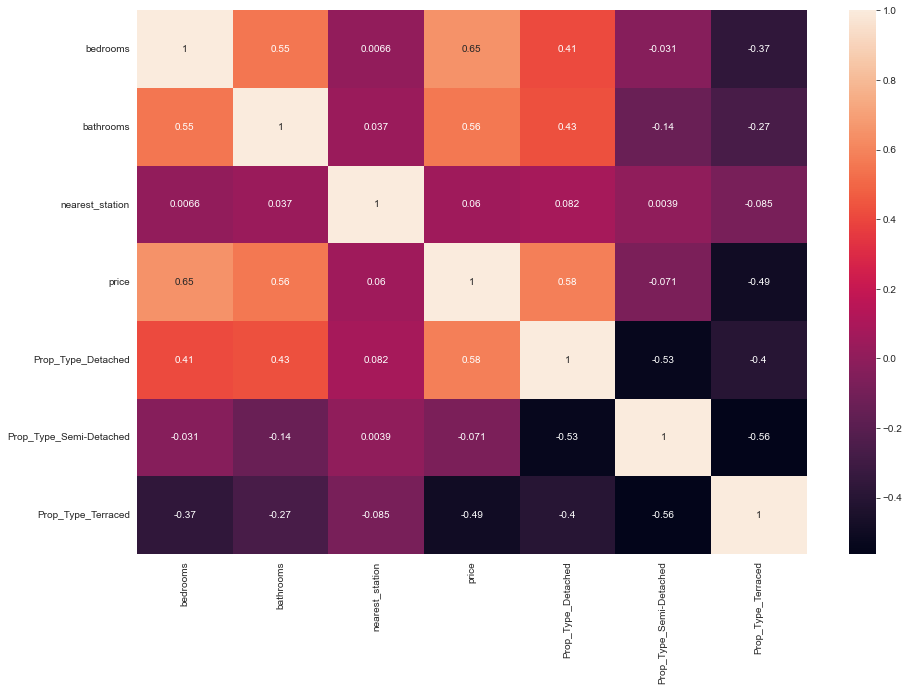

In [1672]:
# Plot a heatmap
# Can see a strong positive correlation between detached properties and price, negligible with semi-detached and a strong negative correlation between terraced and price
plt.figure(figsize = (15, 10))
sns.heatmap(proptypeohe.corr(), annot = True)
plt.show()

In [1664]:
# This will be my dataset for modelling
cleaneddataset = properties3copy.copy()
cleaneddataset.reset_index(drop=True, inplace=True)

In [1665]:
# Save this dataset ready for modelling
# cleaneddataset.to_csv('dataset_for_modelling.csv', index=False)

In [1669]:
# Let's show the final dataset I will be using
cleaneddataset.drop(columns=['url', 'address', 'tenure', 'cleaned_address', 'gcode', 'outcode_from_gcode'], inplace=True)
cleaneddataset.head()

,property_type,bedrooms,bathrooms,nearest_station,price,outcode
0,Detached,5,2,0.7,550000,LS2
1,Terraced,5,1,1.0,325000,LS2
2,Terraced,6,3,0.8,450000,LS3
3,Terraced,3,1,0.5,220000,LS4
4,Detached,5,2,0.2,325000,LS4


In [1678]:
cleaneddataset

,property_type,bedrooms,bathrooms,nearest_station,price,outcode
0,Detached,5,2,0.7,550000,LS2
1,Terraced,5,1,1.0,325000,LS2
2,Terraced,6,3,0.8,450000,LS3
3,Terraced,3,1,0.5,220000,LS4
4,Detached,5,2,0.2,325000,LS4
...,...,...,...,...,...,...
4004,Terraced,3,1,1.5,160000,HD9
4005,Terraced,2,1,1.6,150000,HD9
4006,Terraced,2,1,2.8,150000,HD9
4007,Semi-Detached,2,1,3.4,150000,HD9


In [1670]:
# Remaining dataset - Has 4009 rows, will utilise 5 of these features to train model and one target feature of price
cleaneddataset.shape[0]

4009